In [4]:
pip install louvain

Note: you may need to restart the kernel to use updated packages.


In [1]:
import stlearn as st
import scanpy as sc
from pathlib import Path
st.settings.set_figure_params(dpi=180)

In [2]:
sc.settings.verbosity = 3
# Reading data
data = st.Read10X(path="C:\\Users\\alon2\\Google Drive\\Studies 2\\Year 2\\Final Project\\project_git_repo")
# # Save raw_count
# data.raw = data.X
# Preprocessing
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
st.pp.scale(data)

reading C:\Users\alon2\Google Drive\Studies 2\Year 2\Final Project\project_git_repo\filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
filtered out 1159 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


## PCA

In [5]:
# Run PCA
st.em.run_pca(data,n_comps=50,random_state=0)
# Tiling image
st.pp.tiling(data,out_path="tiling",crop_size = 40)
# Using Deep Learning to extract feature
st.pp.extract_feature(data)
# Apply stSME spatial-PCA option
st.spatial.morphology.adjust(data,use_data="X_pca",radius=50,method="mean")
st.pp.neighbors(data,n_neighbors=25,use_rep='X_pca_morphology',random_state=0)
st.tl.clustering.louvain(data,random_state=0)

computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    with n_comps=50
    finished (0:00:01)


PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


Tiling image: 100%|███████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]
Extract feature:   4%|███                                                                          [ time left: 02:39 ]C:\Users\alon2\anaconda3\envs\stlearn\lib\site-packages\stlearn\image_preprocessing\feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
Extract feature: 100%|████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


Adjusting data: 100%|█████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]
computing neighbors


The data adjusted by morphology is added to adata.obsm['X_pca_morphology']


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)


Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


    finished: found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


## Clustering

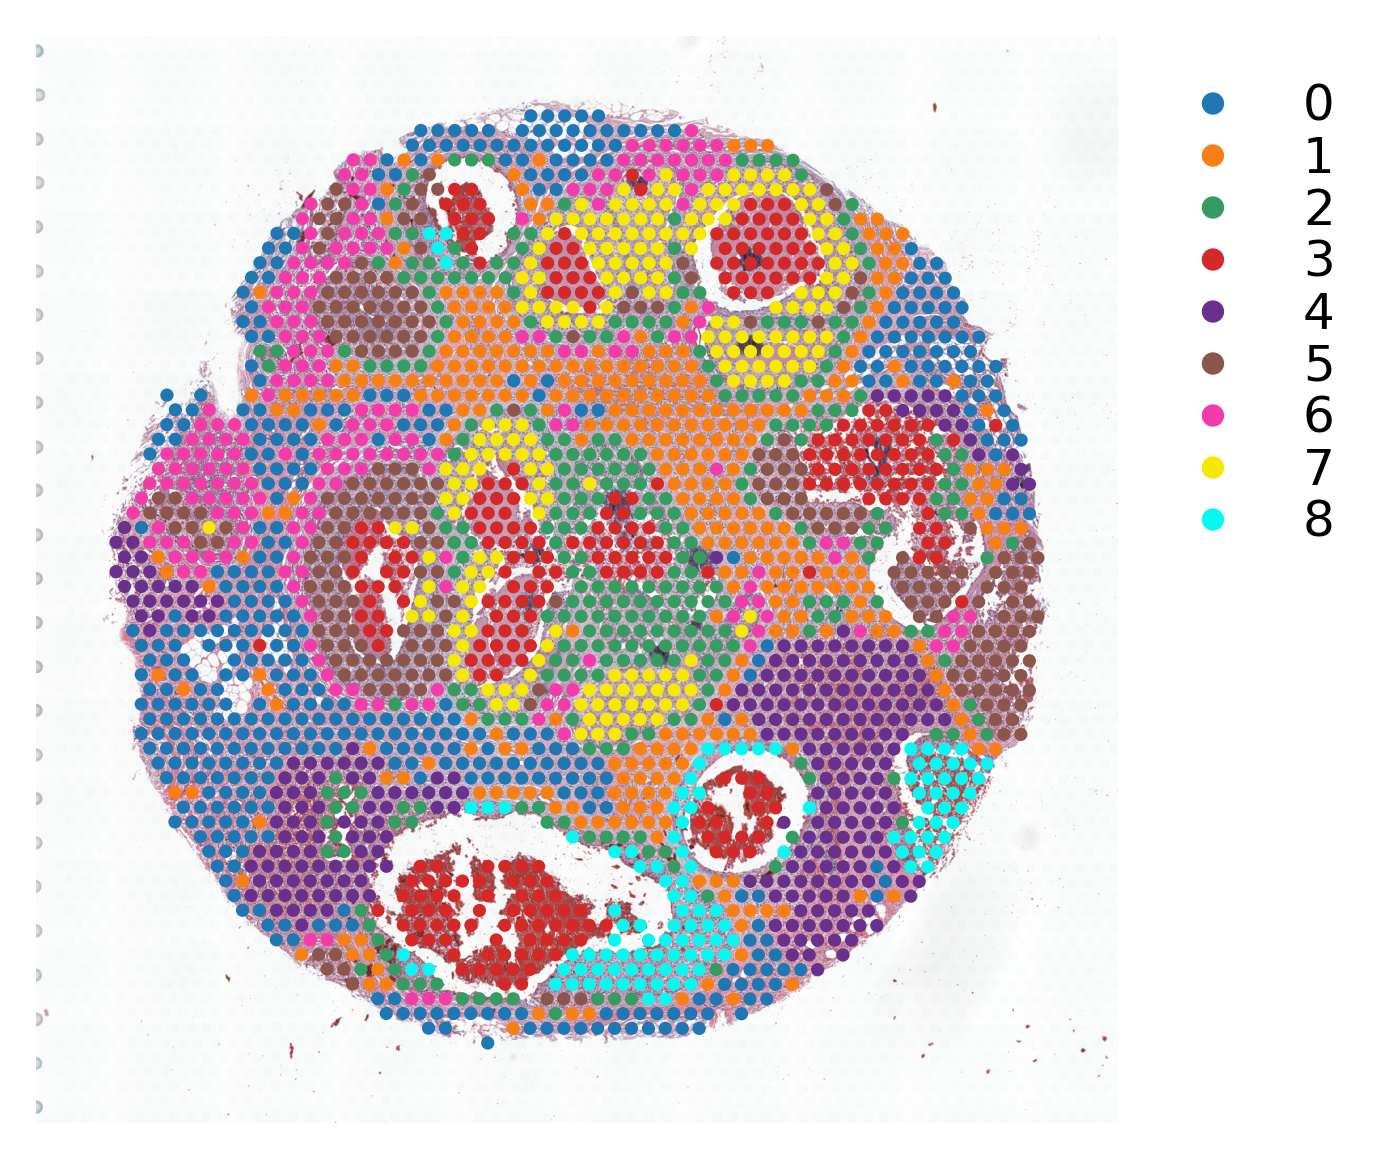

In [6]:
st.pl.cluster_plot(data,use_label="louvain",image_alpha=1,size=7)

## Add anotations

The annotation is added to adata.obs['louvain_anno']


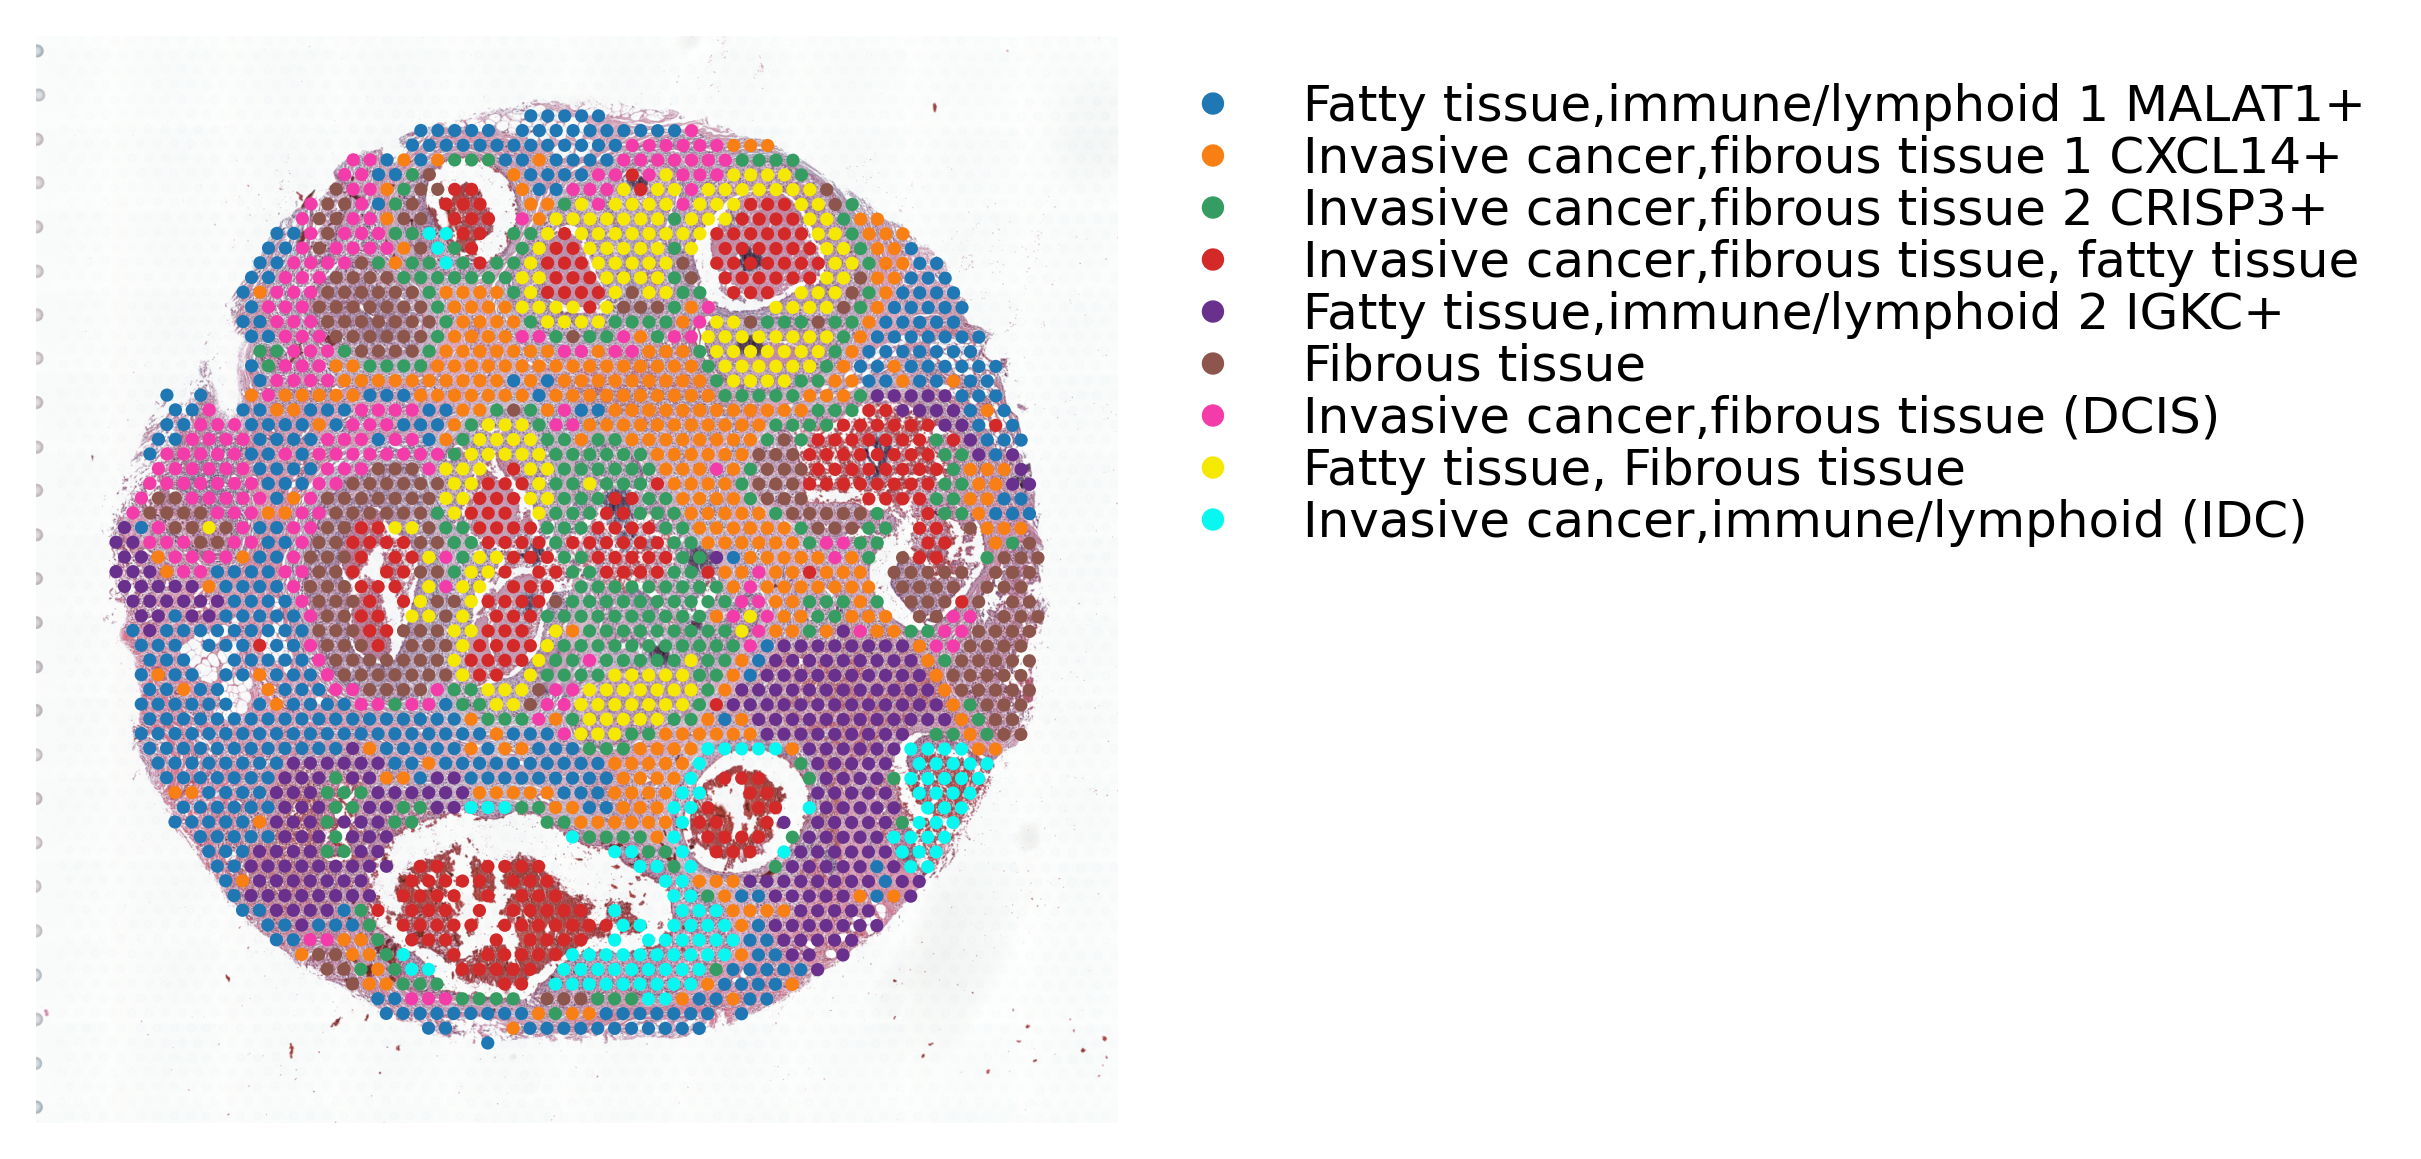

In [8]:
st.add.annotation(data,label_list=['Fatty tissue,immune/lymphoid 1 MALAT1+',
                                   'Invasive cancer,fibrous tissue 1 CXCL14+',
                                   'Invasive cancer,fibrous tissue 2 CRISP3+',
                                   'Invasive cancer,fibrous tissue, fatty tissue',
                                   'Fatty tissue,immune/lymphoid 2 IGKC+',
                                   'Fibrous tissue',
                                   'Invasive cancer,fibrous tissue (DCIS)',
                                   'Fatty tissue, Fibrous tissue',
                                   'Invasive cancer,immune/lymphoid (IDC)'],
                 use_label="louvain")
st.pl.cluster_plot(data,use_label="louvain_anno",image_alpha=1,size=7)